## Exploratory Data Analysis of RNA Expression Data
This notebook is intended to compute some summary statistics and charts of the RNA expression data table as passed to the Open Targets team by Expression Atlas. The table we get from them is a matrix of normalised count (**not RPKM**) values where each column is a tissue and each row is a gene.

In [1]:
%matplotlib inline

### Imports

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

### Load the data file

In [3]:
expression = pd.read_csv('exp_summary_NormCounts_genes_all_Blueprint.txt', sep='\t',index_col=0)
expression.head()

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000000003,3556,1708.00,36.0,576,904.5,672.0,99.0,130.5,546.5,2489.00,...,1043.0,1434,808,4169.0,2396,2311.00,2002.5,1441,422.0,496.5
ENSG00000000005,1026,6.50,2901.0,5,4.0,8.0,0.0,0.0,3.5,1855.75,...,25.0,78,7,1.0,23,5.75,8.0,4,29.5,9.5
ENSG00000000419,1430,1942.75,700.5,937,1375.0,1506.5,669.5,1684.0,1534.0,1534.50,...,1267.0,1174,1857,1610.5,1220,1512.50,1232.0,1312,1590.0,1268.5
ENSG00000000457,720,880.50,392.0,463,606.5,524.0,829.5,341.0,689.0,1053.00,...,658.5,861,1234,564.0,911,1261.50,838.0,922,1120.5,1344.0
ENSG00000000460,272,184.00,7131.0,121,181.0,168.0,238.5,708.0,494.0,224.75,...,217.0,326,850,225.5,213,324.00,292.0,272,493.5,365.0


### Heatmap
Below is a heatmap of the RNA data after the following logarithmic transform:
```
x => log(x + 1)
```

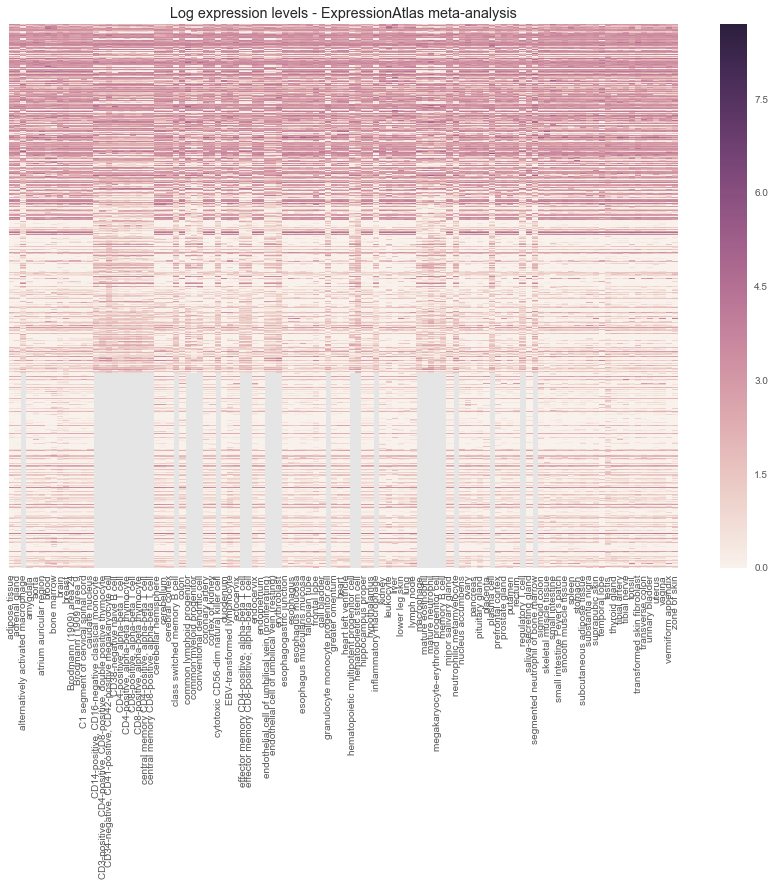

In [4]:
log_expression = np.log10(expression + 1)
plt.figure(figsize=(15, 10))
sns.heatmap(log_expression, yticklabels=False)
plt.title('Log expression levels - ExpressionAtlas meta-analysis')
plt.show()

It seems a bit weird that lower ENSGIDs correspond to higher median expression. One way to find out if this is a batch effect or some sort of weird historical effect of lower ENSGID being discovered first for the most expressed genes, we can use GTEX and see if we observe the same effect.

In [5]:
gtex = pd.read_table('GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct',skiprows=2,index_col=0)
gtex = gtex.drop('Description', 1)
gtex.sort_index(inplace=True)
gtex.head()

ValueError: labels ['Description'] not contained in axis

In [ ]:
gtex.index

In [6]:
expression.index

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000281903', 'ENSG00000281904', 'ENSG00000281905',
       'ENSG00000281906', 'ENSG00000281909', 'ENSG00000281910',
       'ENSG00000281912', 'ENSG00000281918', 'ENSG00000281920',
       'ENSG00000281921'],
      dtype='object', length=49476)

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.log10(gtex + 1), yticklabels=False)
plt.title('Log expression levels - GTEX median data')
plt.show()

### Apply a threshold
Expression Atlas suggested applying a threshold of between 2 and 8, so 6 was chosen.

In [7]:
threshold = np.log10(6)
threshold_log_expression = log_expression[log_expression > threshold]

In [8]:
threshold_log_expression.head()

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000000003,3.551084,3.232742,1.568202,2.761176,2.956888,2.828015,2.000000,2.118926,2.738384,3.396199,...,3.018700,3.156852,2.907949,3.620136,3.379668,3.363988,3.301789,3.158965,2.626340,2.696793
ENSG00000000005,3.011570,0.875061,3.462697,NaN,NaN,0.954243,NaN,NaN,NaN,3.268753,...,1.414973,1.897627,0.903090,NaN,1.380211,0.829304,0.954243,NaN,1.484300,1.021189
ENSG00000000419,3.155640,3.288640,2.846028,2.972203,3.138618,3.178257,2.826399,3.226600,3.186108,3.186250,...,3.103119,3.070038,3.269046,3.207230,3.086716,3.179982,3.090963,3.118265,3.201670,3.103633
ENSG00000000457,2.857935,2.945222,2.594393,2.666518,2.783546,2.720159,2.919340,2.534026,2.838849,3.022841,...,2.819215,2.935507,3.091667,2.752048,2.959995,3.101231,2.923762,2.965202,3.049799,3.128722
ENSG00000000460,2.436163,2.267172,3.853211,2.086360,2.260071,2.227887,2.379306,2.850646,2.694605,2.353628,...,2.338456,2.514548,2.929930,2.355068,2.330414,2.511883,2.466868,2.436163,2.694166,2.563481


### Reshape to one-dimensional array

In [9]:
flat_expression = expression.values.flatten()
flat_log_expression = log_expression.values.flatten()
flat_threshold_log_expression = threshold_log_expression.values.flatten()

# filter nans
flat_threshold_log_expression = flat_threshold_log_expression[~np.isnan(flat_threshold_log_expression)]

In [15]:
flat_log_expression = flat_log_expression[~np.isnan(flat_log_expression)]

### Plot a histogram and calculate levels
Possible 10-level calculation schemes include:
* deciles
* division of the log expression range into ten portions (effectively the histogram buckets below)

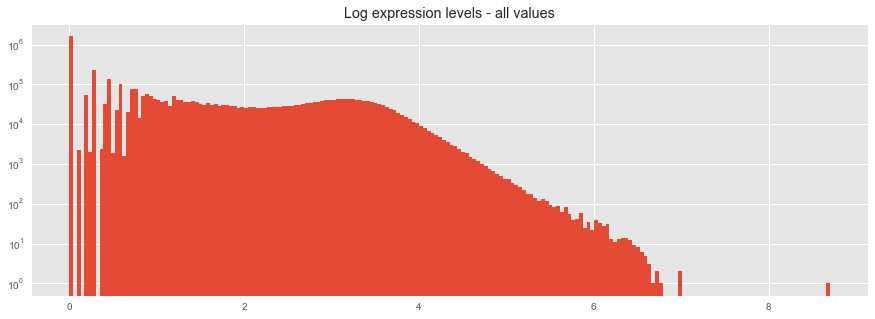

In [16]:
plt.figure(figsize=(15, 5))
plt.hist(flat_log_expression, bins=200)
plt.title('Log expression levels - all values')
plt.yscale('log')
plt.show()

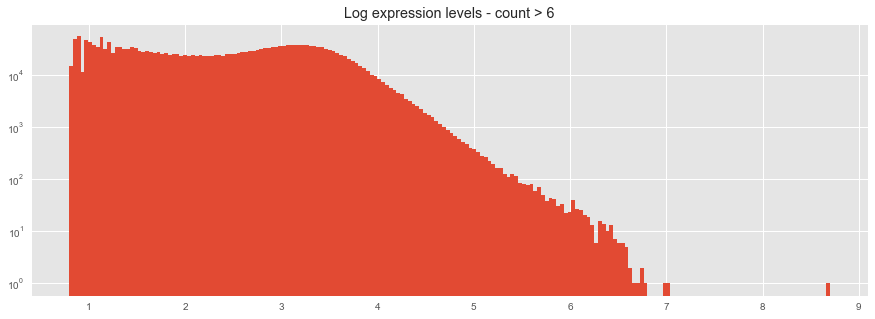

In [17]:
plt.figure(figsize=(15, 5))
plt.hist(flat_threshold_log_expression, bins=200)
plt.title('Log expression levels - count > 6')
plt.yscale('log')
plt.show()

### Check distribution per tissue
The following boxplot shows the distribution of values per tissue.

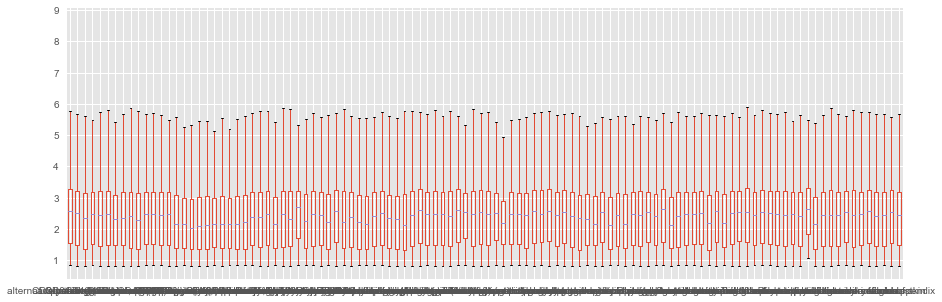

In [18]:
plt.figure()
threshold_log_expression.plot.box(figsize=(15, 5))
plt.show()

### Check distribution per gene
There are too many genes for an equivalent to the above, but histograms of some summary statistics (per gene) should give a sense of the distributions. They are much more variable than the per tissue distributions.

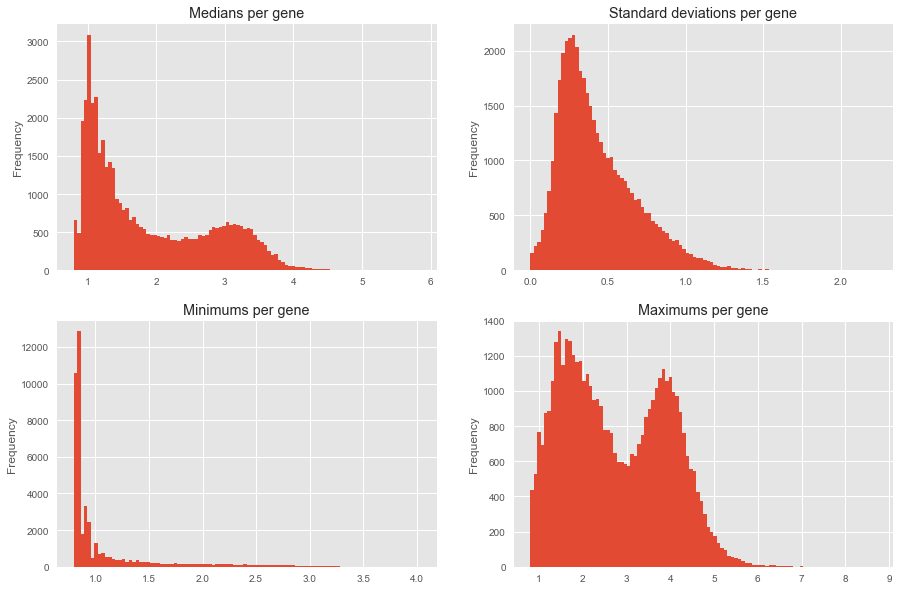

In [20]:
medians = threshold_log_expression.T.median()
stds = threshold_log_expression.T.std()
mins = threshold_log_expression.T.min()
maxs = threshold_log_expression.T.max()

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.title('Medians per gene')
medians.plot.hist(bins=100)

plt.subplot(222)
plt.title('Standard deviations per gene')
stds.plot.hist(bins=100)

plt.subplot(223)
plt.title('Minimums per gene')
mins.plot.hist(bins=100)

plt.subplot(224)
plt.title('Maximums per gene')
maxs.plot.hist(bins=100)

plt.show()

### Generate buckets using the threshold log method
Create ten buckets of equal width (in the `log(counts + 1)` axis). Note that this means the buckets will not have equal numbers of entries (ie. unlike deciles).

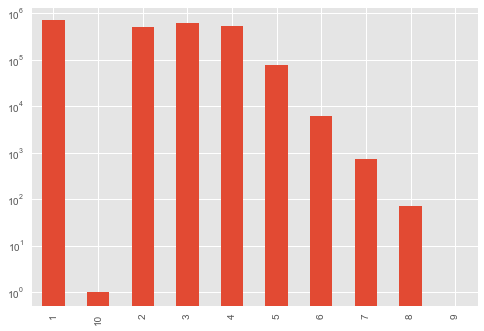

In [21]:
str_labels=['1','2','3','4','5','6','7','8','9','10']
threshold_log_binned = pd.cut(threshold_log_expression.unstack(),bins=10,labels=str_labels)
threshold_log_binned.value_counts(sort=False).plot.bar(logy=True)

In [22]:
# how many data points in each bucket?
threshold_log_binned.value_counts().sort_index()

1     715504
10         1
2     507054
3     631573
4     534286
5      75835
6       6160
7        746
8         70
9          0
dtype: int64

#### Save gene x tissue matrix of bin values to file

In [23]:
threshold_log_binned_array = threshold_log_binned.unstack(level=0, fill_value=-1)
threshold_log_binned_array.head()

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000000003,4,4,1,3,3,3,2,2,3,4,...,3,3,3,4,4,4,4,3,3,3
ENSG00000000005,3,1,4,NaN,NaN,1,NaN,NaN,NaN,4,...,1,2,1,NaN,1,1,1,NaN,1,1
ENSG00000000419,3,4,3,3,3,4,3,4,4,4,...,3,3,4,4,3,4,3,3,4,3
ENSG00000000457,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
ENSG00000000460,3,2,4,2,2,2,3,3,3,2,...,2,3,3,2,2,3,3,3,3,3


In [24]:
threshold_log_binned_array.to_csv('expatlas.baseline.binned.tsv',sep='\t',na_rep='-1')

### Generate buckets using the deciles method
Create ten buckets using deciles.

[ 0  1  2  3  4  5  6  7  8  9 10]
[2971131  225694  268273  245426  248609  246949  247674  247218  247137
  247134  247115]


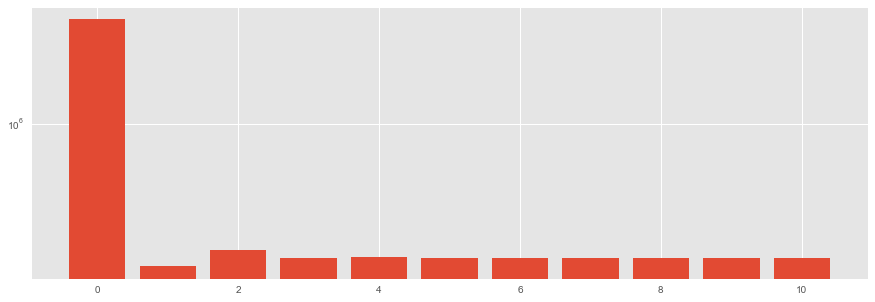

In [25]:
deciles = np.percentile(flat_threshold_log_expression, np.arange(0, 101, 10))
decile_levels = DataFrame(data=np.digitize(np.nan_to_num(threshold_log_expression), deciles[:-1]),
                          index=expression.index,
                          columns=expression.columns)
# How many items per bin?
uniq, counts = np.unique(decile_levels.values.flatten(), return_counts=True)
print(uniq)
print(counts)
plt.figure(figsize=(15, 5))
plt.bar(uniq, counts)
plt.yscale('log')
plt.show()

This is far less useful. **let's use the approach above** (Eliseo + Ian)

### Look at specific gene profiles
This is what is eventually displayed on the RNA baseline expression widget. The following genes have been identified as interesting:
* OPALIN: ENSG00000197430
* MB: ENSG00000198125
* IL5: ENSG00000113525

In [ ]:
# opalin_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000197430'],
#                                'threshold_log_levels': threshold_log_levels.T['ENSG00000197430']})
# plt.figure(figsize=(15, 5))
# opalin_comparison.plot.bar(title='OPALIN', figsize=(15, 5))
# plt.show()

In [ ]:
# mb_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000198125'],
#                            'threshold_log_levels': threshold_log_levels.T['ENSG00000198125']})
# plt.figure(figsize=(15, 5))
# mb_comparison.plot.bar(title='MB', figsize=(15, 5))
# plt.show()

In [ ]:
# il5_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000113525'],
#                             'threshold_log_levels': threshold_log_levels.T['ENSG00000113525']})
# plt.figure(figsize=(15, 5))
# il5_comparison.plot.bar(title='IL5', figsize=(15, 5))
# plt.show()

### How linked are pairs of tissues and pairs of genes?

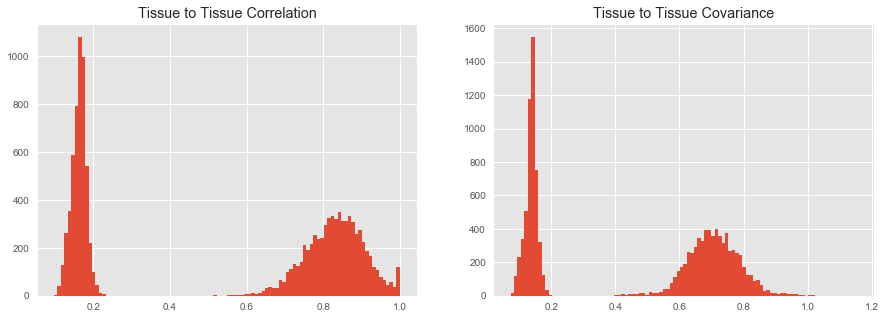

In [26]:
tissue_corr = threshold_log_expression.corr()
tissue_cov = threshold_log_expression.cov()
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Tissue to Tissue Correlation')
plt.hist(tissue_corr.values.flatten(), bins=100)

plt.subplot(122)
plt.title('Tissue to Tissue Covariance')
plt.hist(tissue_cov.values.flatten(), bins=100)

plt.show()

The top correlated tissues are:

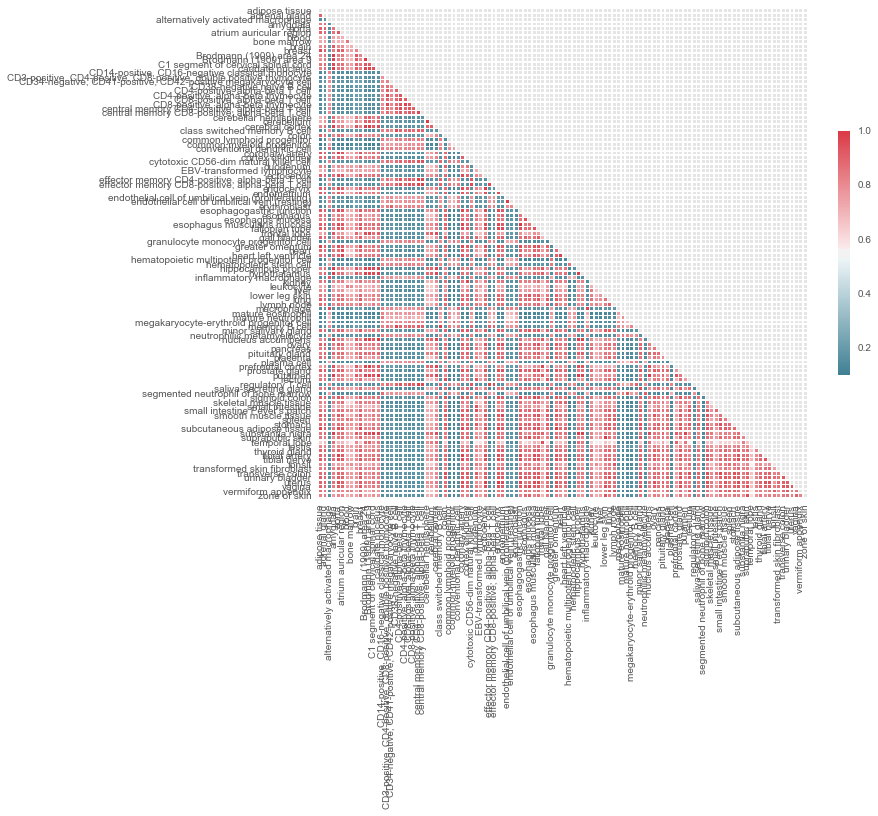

In [27]:
# Generate a mask for the upper triangle
mask = np.zeros_like(tissue_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tissue_corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

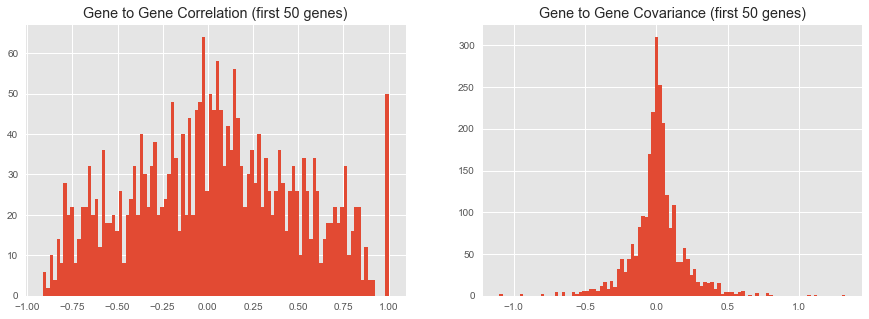

In [28]:
# There are too many gene-gene comparisons to complete in a reasonable time,
# so pick the first 50 genes and just do pairwise comparisons on those.
gene_subset = threshold_log_expression.head(n=50)
gene_corr = gene_subset.T.corr()
gene_cov = gene_subset.T.cov()
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Gene to Gene Correlation (first 50 genes)')
plt.hist(gene_corr.values.flatten(), bins=100)

plt.subplot(122)
plt.title('Gene to Gene Covariance (first 50 genes)')
plt.hist(gene_cov.values.flatten(), bins=100)

plt.show()

Much more randomly distributed, as expected.

## Tissue-Specificity Metrics
There are multiple ways to calculate tissue-specificity per gene and this [paper](https://academic.oup.com/bib/article/18/2/205/2562739/A-benchmark-of-gene-expression-tissue-specificity) offers a comparison. Based on their recommendation, the tau method is calculated below. However, this gives a single value per gene, which is not ideal for faceting (since we don't then know which tissue is responsible for a strong specificity). Some other methods (such as z-score) are therefore also calculated.

In [29]:
# x_hat is an intermediate step and gives a normalised value per gene-tissue cell
# (tau is per gene; ie. an aggregation occurs across tissues)
gene_maxes = log_expression.T.max()
normaliser = DataFrame(data=[gene_maxes.values] * len(log_expression.columns),
                       index=expression.columns,
                       columns=expression.index)
x_hat = log_expression / normaliser.T
tau = x_hat.T.apply(lambda x: 1 - x).sum() / log_expression.shape[1]

### Tissue-specificity by tau
To view the sorted list, call the following:
```
print(tau.sort_values())
```
A couple of the top gene hits by tau value are listed below, and looking at their GTEx profile shows very small absolute values, with one pronounced tissue, which is exactly the case we looked for in IL5.
* ENSG00000187545 = PRAMEF10
* ENSG00000166351 = POTED

Below is a histogram of the tau value across all genes.

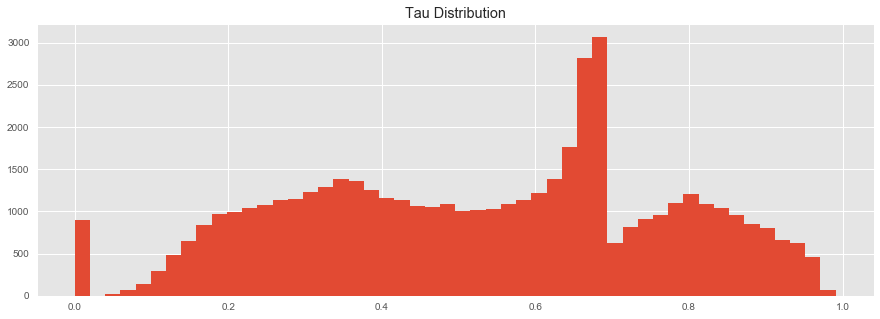

In [30]:
plt.figure(figsize=(15, 5))
plt.title('Tau Distribution')
tau.hist(bins=50)
plt.show()

In [31]:
# Where do IL5, MB and OPALIN fit in?

# IL5
print(tau.T['ENSG00000113525'])
# OPALIN
print(tau.T['ENSG00000197430'])
# MB
print(tau.T['ENSG00000198125'])

0.827800059476
0.805443922946
0.642497500199


In [32]:
tau.to_csv('tau.tsv', sep="\t")

In [33]:
pd.cut(tau,bins=10,labels=range(int(1),11)).astype(int).to_csv('tau.bins.tsv',sep="\t")

**Based on the examples above, z-score (below) fits better our criteria.** (eliseo + ian)

## Tissue-specificity by z-score
The z-score is calculcated as `z = x - mu / sigma` where `mu` is the mean of gene expression, `sigma` is the standard deviation.

In [34]:
zscore = threshold_log_expression.apply(lambda x: (x - x.mean()) /x.std(ddof=0), axis=1)
zscore.head()

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000000003,1.267922,0.826030,-1.484527,0.171447,0.443116,0.264226,-0.885145,-0.720064,0.139809,1.052926,...,0.528918,0.720686,0.375182,1.363773,1.029979,1.008213,0.921875,0.723620,-0.015719,0.082077
ENSG00000000005,0.814844,-1.228912,1.246386,NaN,NaN,-1.153168,NaN,NaN,NaN,1.060862,...,-0.712439,-0.250739,-1.202100,NaN,-0.745692,-1.272683,-1.153168,NaN,-0.646122,-1.089128
ENSG00000000419,0.353368,0.930344,-0.989771,-0.442406,0.279528,0.451487,-1.074924,0.661204,0.485546,0.486160,...,0.125528,-0.017984,0.845340,0.577176,0.054367,0.458971,0.072793,0.191231,0.553055,0.127755
ENSG00000000457,0.156329,0.528907,-0.968586,-0.660723,-0.161196,-0.431759,0.418429,-1.226256,0.074861,0.860216,...,-0.008947,0.487439,1.153997,-0.295642,0.591963,1.194822,0.437305,0.614188,0.975287,1.312165
ENSG00000000460,-0.033258,-0.328025,2.438473,-0.643412,-0.340410,-0.396549,-0.132432,0.689718,0.417539,-0.177222,...,-0.203684,0.103468,0.828010,-0.174709,-0.217713,0.098821,0.020301,-0.033258,0.416773,0.188821


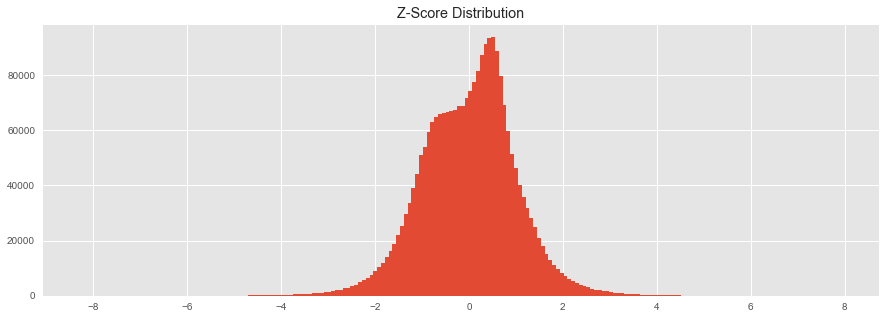

In [35]:
plt.figure(figsize=(15, 5))
plt.title('Z-Score Distribution')
zscore.unstack().hist(bins=200)
# plt.yscale('log')
plt.show()

cytotoxic CD56-dim natural killer cell             3.544603
central memory CD8-positive, alpha-beta T cell     2.459031
effector memory CD8-positive, alpha-beta T cell    2.270943
common lymphoid progenitor                         1.247983
mature eosinophil                                  0.990960
effector memory CD4-positive, alpha-beta T cell    0.705920
central memory CD4-positive, alpha-beta T cell     0.686200
segmented neutrophil of bone marrow                0.574005
CD14-positive, CD16-negative classical monocyte    0.324100
conventional dendritic cell                        0.310133
Name: ENSG00000113525, dtype: float64


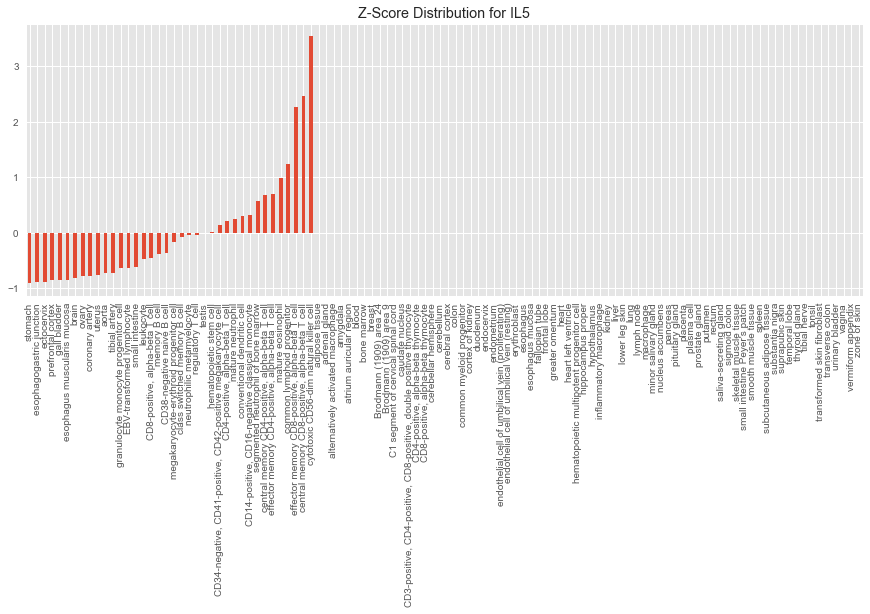

In [36]:
def zscgene(ensgid,genename):
    gene = zscore.loc[ensgid]
    print(gene.sort_values(ascending=False).head(10))

    plt.figure(figsize=(15, 5))
    plt.title('Z-Score Distribution for %s' % genename)
    gene.sort_values().plot.bar()
    plt.show()

zscgene('ENSG00000113525','IL5')

frontal lobe                          1.184651
brain                                 0.979235
putamen                               0.977964
hippocampus proper                    0.916863
amygdala                              0.887279
prefrontal cortex                     0.886813
C1 segment of cervical spinal cord    0.765295
temporal lobe                         0.727488
substantia nigra                      0.691484
caudate nucleus                       0.683233
Name: ENSG00000197430, dtype: float64


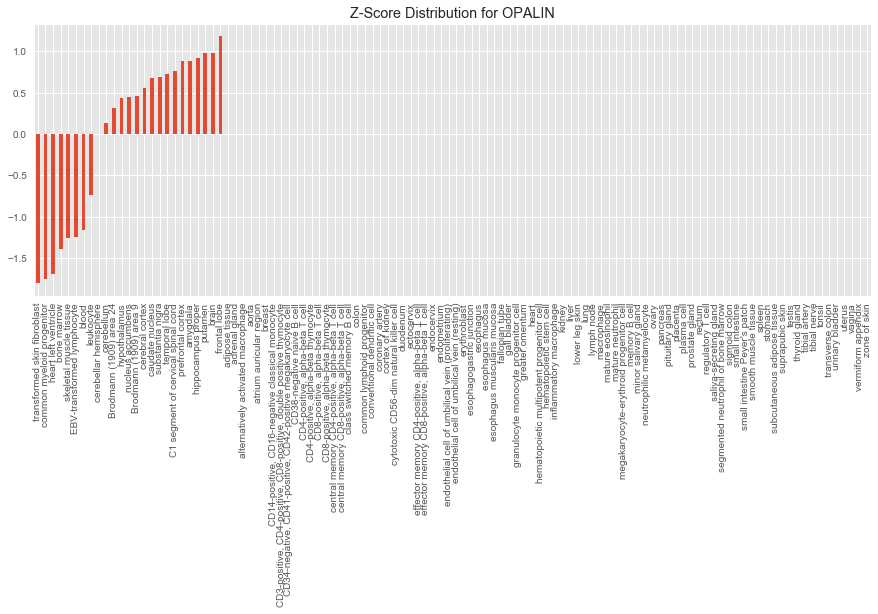

In [37]:
# Is OPALIN specifically expressed in brain?
zscgene('ENSG00000197430','OPALIN')

atrium auricular region    3.968270
heart left ventricle       3.934243
heart                      3.870851
skeletal muscle tissue     3.496436
breast                     2.137315
testis                     1.713610
minor salivary gland       1.349523
saliva-secreting gland     1.273226
pituitary gland            0.839048
prostate gland             0.796271
Name: ENSG00000198125, dtype: float64


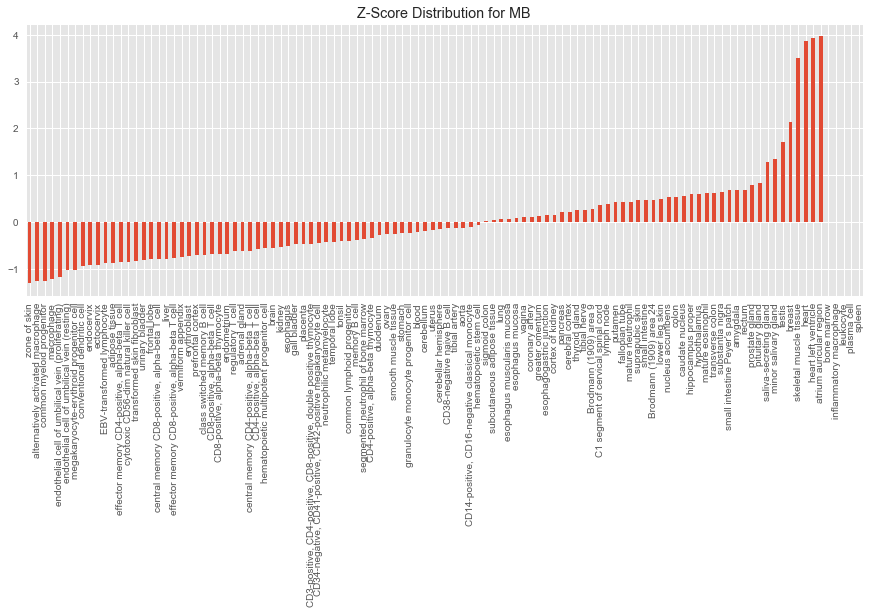

In [38]:
# Is MB specifically expressed in heart and muscle?
zscgene('ENSG00000198125','MB')

## Bin the z-scores
For the sake of the API, it is nice to bin the data for z-score:

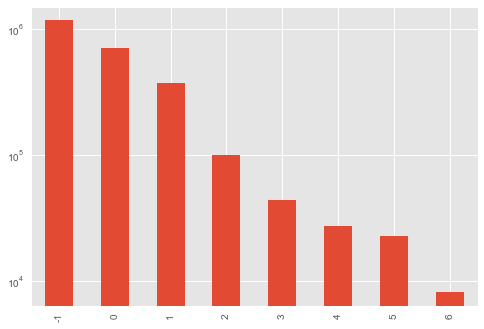

In [39]:
actual_labels=['NA','below top 10%','top25%',"top10%",'top5%','top2.5%','top1%','top0.1%']
num_labels=['-1','0','1','2','3','4','5','6']
zsc_binned = pd.cut(zscore.unstack(),
           bins=[float("-inf"),0,0.674,1.281,1.645,1.96,2.326,3.09,float("inf")],
           labels=num_labels)
zsc_binned.value_counts(sort=False).plot.bar(logy=True)

In [40]:
zsc_binned_array = zsc_binned.unstack(level=0)
zsc_binned_array.head()

,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000000003,1,1,-1,0,0,0,-1,-1,0,1,...,0,1,0,2,1,1,1,1,-1,0
ENSG00000000005,1,-1,1,NaN,NaN,-1,NaN,NaN,NaN,1,...,-1,-1,-1,NaN,-1,-1,-1,NaN,-1,-1
ENSG00000000419,0,1,-1,-1,0,0,-1,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
ENSG00000000457,0,0,-1,-1,-1,-1,0,-1,0,1,...,-1,0,1,-1,0,1,0,0,1,2
ENSG00000000460,-1,-1,5,-1,-1,-1,-1,1,0,-1,...,-1,0,1,-1,-1,0,0,-1,0,0


In [41]:
# test for a specific disease
## 1. get a gene list
SMA3 = 'Orphanet_83419'
import requests
r = requests.get('https://mk-zscorefacet-dot-open-targets-eu-dev.appspot.com/api/latest/public/association/filter', params={'disease':SMA3,'size':'50','facets':'true','nocache':'true'})
r.json()

{'data': [{'association_score': {'datasources': {'23andme': 0.0,
     'cancer_gene_census': 0.0,
     'chembl': 0.0,
     'europepmc': 0.02859155555555556,
     'eva': 0.878607138888889,
     'eva_somatic': 0.0,
     'expression_atlas': 0.0,
     'gene2phenotype': 0.0,
     'genomics_england': 0.0,
     'gwas_catalog': 0.0,
     'intogen': 0.0,
     'phenodigm': 0.0,
     'phewas_catalog': 0.0,
     'reactome': 0.0,
     'slapenrich': 0.0,
     'uniprot': 1,
     'uniprot_literature': 0.985,
     'uniprot_somatic': 0.0},
    'datatypes': {'affected_pathway': 0.0,
     'animal_model': 0.0,
     'genetic_association': 1.0,
     'known_drug': 0.0,
     'literature': 0.02859155555555556,
     'rna_expression': 0.0,
     'somatic_mutation': 0.0},
    'overall': 1.0},
   'disease': {'efo_info': {'label': 'Proximal spinal muscular atrophy type 3',
     'path': [['EFO_0000508',
       'Orphanet_71859',
       'Orphanet_98497',
       'Orphanet_70',
       'Orphanet_83419'],
      ['EFO_0000508

In [43]:
sma3genes = []
for g in r.json()['data']:
    sma3genes.append(g['target']['id'])
print(sma3genes[0:5])
print(len(sma3genes))
## 2. filter the zscore table
zsc_binned_array.loc[sma3genes].head()

['ENSG00000172062', 'ENSG00000205571', 'ENSG00000171126', 'ENSG00000135519', 'ENSG00000116396']
48


,adipose tissue,adrenal gland,alternatively activated macrophage,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ENSG00000172062,-1,-1,3,-1,-1,-1,-1,0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ENSG00000205571,1,0,-1,0,0,0,-1,2,0,1,...,0,0,0,1,0,0,0,0,1,1
ENSG00000171126,NaN,-1,0,-1,NaN,NaN,NaN,NaN,-1,NaN,...,NaN,-1,NaN,NaN,-1,NaN,NaN,NaN,-1,-1
ENSG00000135519,-1,-1,0,3,-1,-1,2,0,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ENSG00000116396,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1


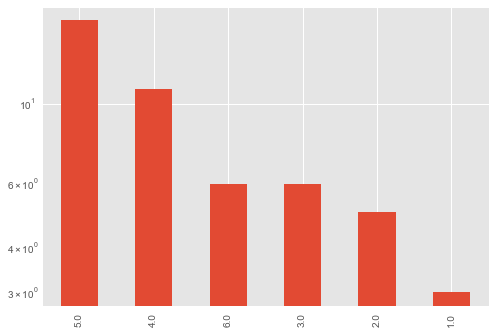

In [44]:
zsc_binned_array.loc[sma3genes].fillna('0').max(axis=1).value_counts().plot.bar(logy=True)
# ..stack() #.value_counts() #.plot.bar(logy=True)

In [45]:
zsc_binned_array.loc[sma3genes].stack().value_counts()

-1    2191
0     1010
1      726
2      232
3       97
4       49
5       42
6        8
dtype: int64

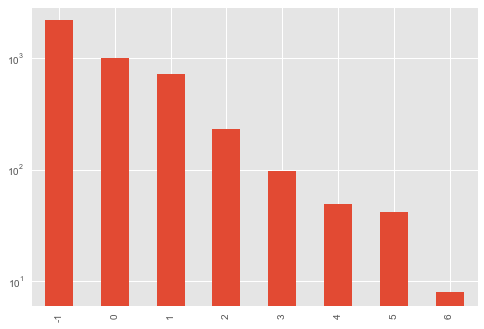

In [46]:
zsc_binned_array.loc[sma3genes].stack().value_counts().plot.bar(logy=True)

### Save zscore and bins to file
Store the z-score values

In [47]:
#tau.to_csv('tau.tsv', sep='\t')
zscore.to_csv('expatlas.baseline.z-score.tsv', sep='\t')
zsc_binned_array.to_csv('expatlas.baseline.z-score.binned.tsv', sep='\t',na_rep='-1')

***

# Which measure would be better for a facet and for the expression view?

It's useful to compare how the scores would look in an expression summary view. 

Note that I am restoring first the binned values from the files (to make sure NaN are treated the same and to simulate what would happen when the file is read by the data_pipeline code.

In [48]:
MB = 'ENSG00000198125'
OPALIN = 'ENSG00000197430'
IL5 = 'ENSG00000113525'
baseline = pd.read_table('expatlas.baseline.binned.tsv',index_col=0)
zed = pd.read_table('expatlas.baseline.z-score.binned.tsv',index_col=0)

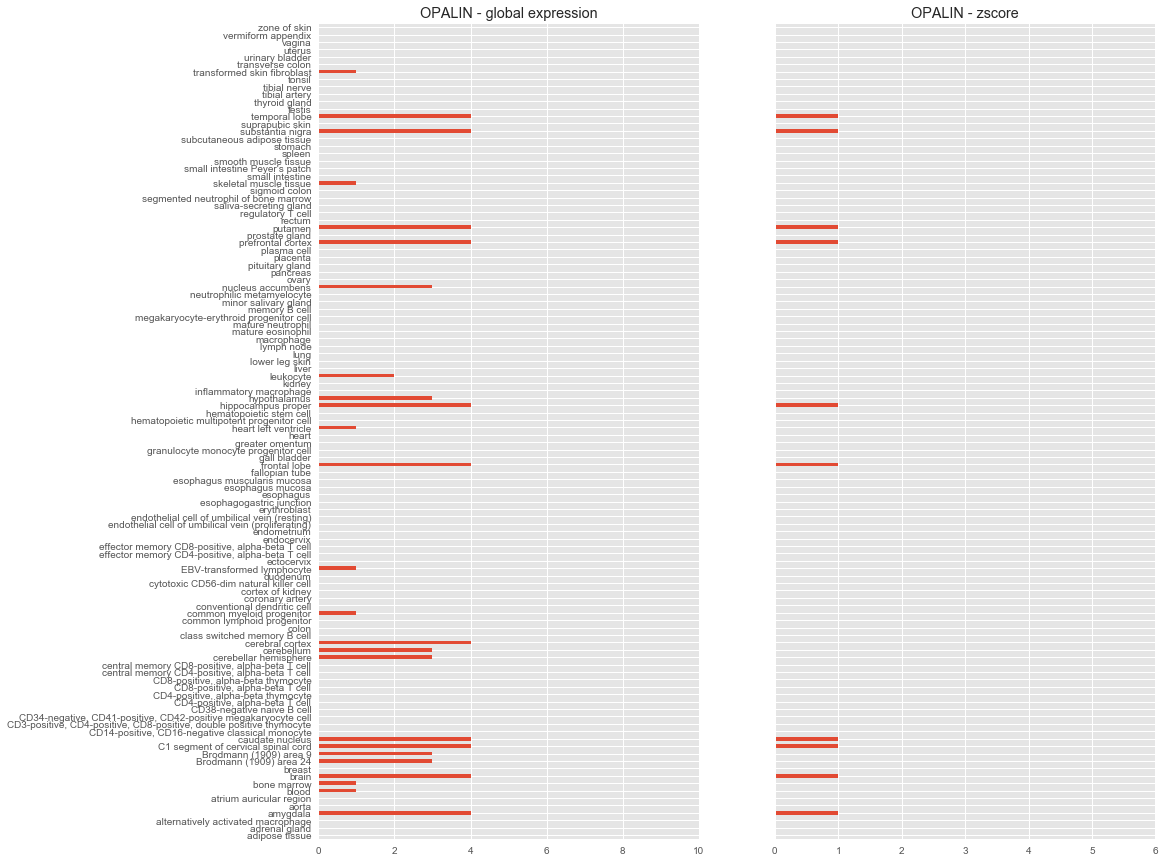

In [49]:
#OPALIN
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[OPALIN].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('OPALIN - global expression')

zed[zed>0].loc[OPALIN].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('OPALIN - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())

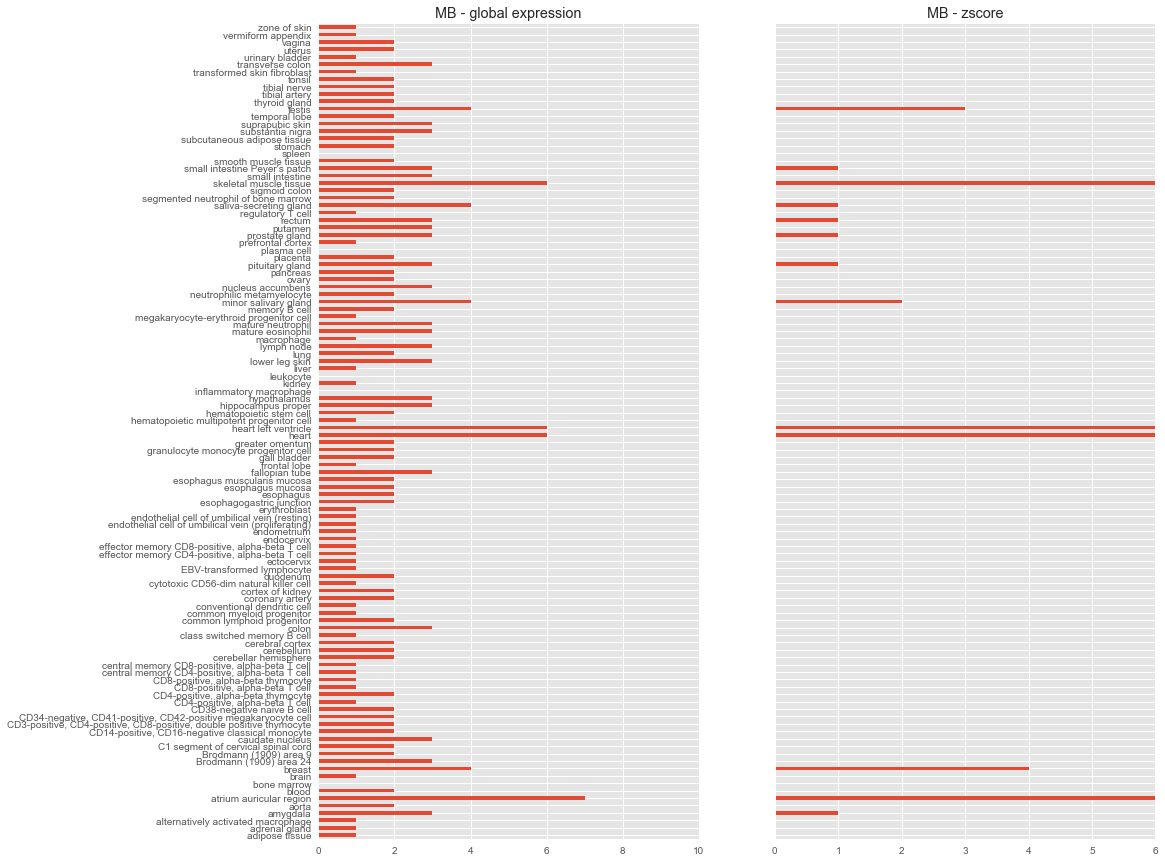

In [50]:
#MB gene
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[MB].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('MB - global expression')

zed[zed>0].loc[MB].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('MB - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())


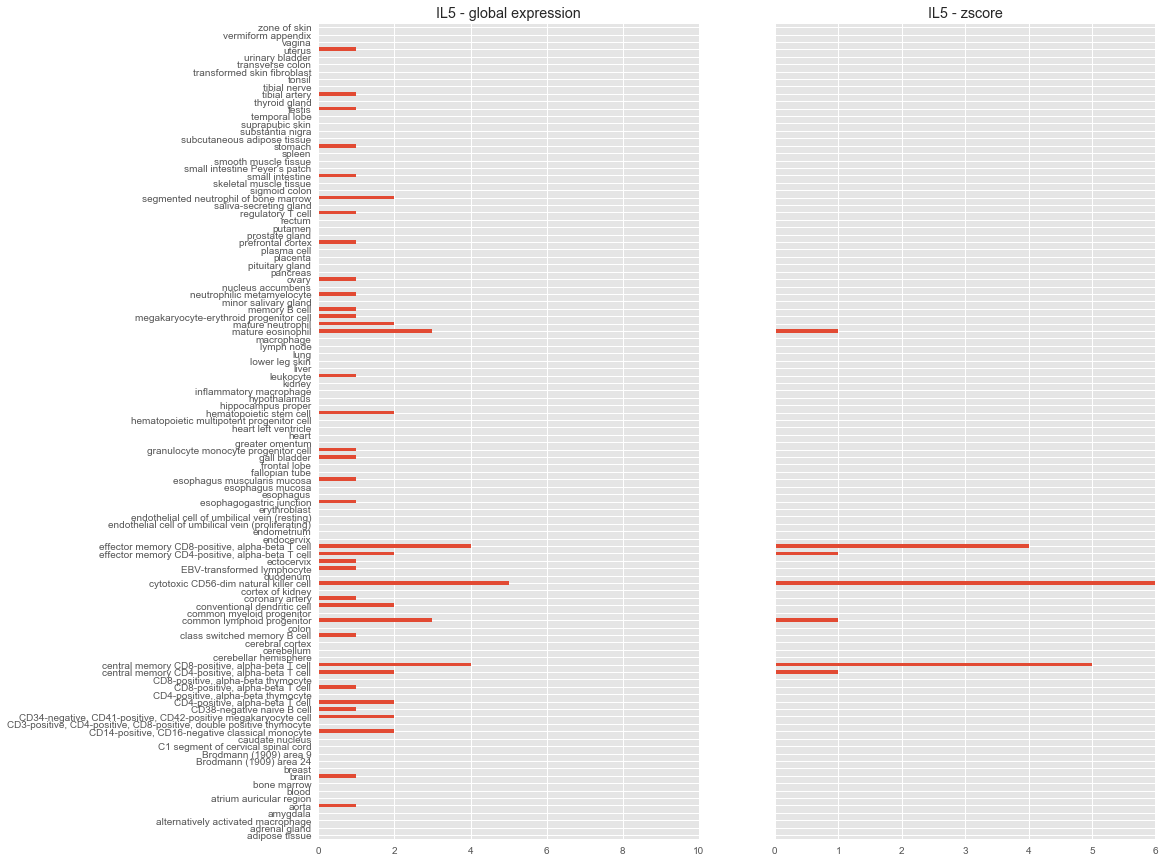

In [51]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[IL5].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('IL5 - global expression')

zed[zed>0].loc[IL5].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('IL5 - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())